In [1]:
%autoreload 2

UsageError: Line magic function `%autoreload` not found.


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import sncosmo
import tdaspop
import snpop

In [4]:
from snpop import SimpleSALTPopulation

In [5]:
from collections import OrderedDict

In [6]:
print(sncosmo.__version__)
print(tdaspop.__version__)
print(snpop.__version__)

2.1.0
0.2.0
0.1.8dev11


In [7]:
snpop.__file__

'/Users/rbiswas/soft/mypython3/lib/python3.7/site-packages/snpop-0.1.8.dev11-py3.7.egg/snpop/__init__.py'

# Simple SALT Distributions

The SALT model used for SNIa has the following parameters for each SNIa :
```x0, x1, c, z, t0 ```. During training, `SALT2` is designed to scale variables, such that at the
end of its training `x1` has a standard deviation of `1.0`, and `c` has a standard deviation of `0.1`.
While this does not imply that (a) the population of SNe have the same standard deviations for these
parameters and (b) they are uncorrelated, a population drawn with un-correlated `c` and `x1` with these
standard deviations is consistent with a homogeneous selection for the SALT2 training sample, and is often
used in simulations. A population with this character is described by `SimpleSALTPopulation`

There are two ways to use it:
1. Use it with a supplied sample of SN redshifts.
2. Supply it with the area of the sky, the duration of the survey, and the redshift bounds, and it will use a powerlaw rate for SN to obtain a redshift sample, and run through with the previous case. 

To start with we describe the first case

### `SimpleSALTPopulation`

obtain a set of samples for the redshift

In [8]:
zSamples = np.random.uniform(0, 1.0, size=10)
print(zSamples)

[0.89569389 0.27270326 0.91988749 0.85249179 0.23981199 0.87612138
 0.82816166 0.66060493 0.82992039 0.47741533]


Instantiate the object

In [9]:
sp = SimpleSALTPopulation(dist=' zSamples, rng=np.random.RandomState(1))

TypeError: __init__() missing 1 required positional argument: 'zSamples'

In [10]:
sp.idxvalues

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
sp.zSamples

array([0.73149001, 0.61689169, 0.13057379, 0.47196345, 0.89053096,
       0.8474887 , 0.93322106, 0.83147892, 0.09763732, 0.27832286])

In [12]:
sp.cosmo

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

In [13]:
sp.paramsTable

,x0,mB,x1,c,MnoDisp,Mabs,t0,z,model
idx,,,,,,,,,
0,0.000006,23.478571,-0.172428,0.174481,-19.828904,-19.847337,61102.130317,0.731490,SALT2
1,0.000005,23.770619,-0.877858,-0.076121,-18.964417,-19.104782,62209.184401,0.616892,SALT2
2,0.000238,19.562418,0.042214,0.031904,-19.404822,-19.445005,59580.417468,0.130574,SALT2
3,0.000010,22.969719,0.582815,-0.024937,-19.285807,-19.206254,60683.513890,0.471963,SALT2
4,0.000004,24.108104,-1.100619,0.146211,-19.638034,-19.741783,60115.659001,0.890531,SALT2
5,0.000002,24.879094,1.144724,-0.206014,-18.779035,-18.838548,59917.035871,0.847489,SALT2
6,0.000002,24.574012,0.901591,-0.032242,-19.297936,-19.401012,60259.849772,0.933221,SALT2
7,0.000003,24.305317,0.502494,-0.038405,-19.234681,-19.361462,60841.296654,0.831479,SALT2
8,0.000647,18.473891,0.900856,0.113377,-19.755098,-19.855785,61028.201281,0.097637,SALT2


In [14]:
sp.modelParams(3)

OrderedDict([('x0', 1.029819542459318e-05),
             ('mB', 22.969718522108778),
             ('x1', 0.5828152137158222),
             ('c', -0.02493703754774101),
             ('MnoDisp', -19.285807375608833),
             ('Mabs', -19.206254055598105),
             ('t0', 60683.51389010622),
             ('z', 0.4719634511240829),
             ('model', 'SALT2')])

### 2. Generate From the skyArea, redshift bounds and survey Duration

This uses the `fromSkyArea` method

In general, we will not have a redshift distribution or a redshift sample to use. In this case, we prefer to use 
the `fromSkyArea` method which instead obtains these samples from using the fieldArea, zmin and zmax. Right now, we also need `numzBins` because of the binned implementation which we will later get rid of.

In [15]:
spz = SimpleSALTPopulation.fromSkyArea(rng=np.random.RandomState(1), fieldArea=0.5)

In [16]:
spz.zSamples.size

1351

In [17]:
spz.numSources

1351

In [18]:
spz.paramsTable.head()

,x0,mB,x1,c,MnoDisp,Mabs,t0,z,model
idx,,,,,,,,,
0,0.000212,19.685243,0.068710,0.074434,-19.541281,-19.292908,62394.169557,0.128958,SALT2
1,0.000071,20.869749,-2.032609,0.112311,-19.429069,-19.389186,60783.533039,0.220232,SALT2
2,0.000104,20.455686,0.471687,0.089569,-19.633132,-19.599033,62487.438845,0.202496,SALT2
3,0.000082,20.720169,-1.111806,-0.107869,-18.838994,-18.885327,60764.929876,0.168033,SALT2
4,0.000041,21.460815,-0.722469,0.039118,-19.343358,-19.382567,60703.770920,0.279210,SALT2


## Characterizations of the Distribution

## Form of the internal dispersion

In [19]:
import scipy

/Users/rbiswas/soft/mypython3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


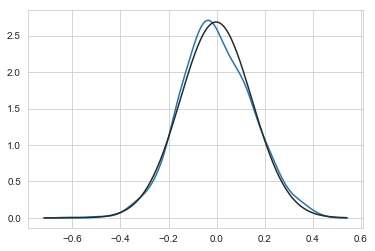

In [20]:
fig, ax = plt.subplots()
sns.distplot(spz.paramsTable.Mabs - spz.paramsTable.MnoDisp, hist=False, fit=scipy.stats.norm)

## Checks on the Hubble Diagram

In [21]:
from astropy.cosmology import Planck15

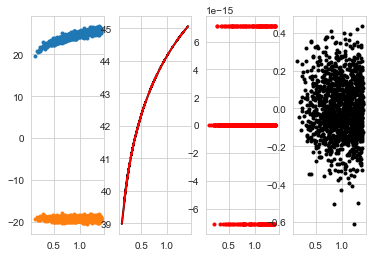

In [22]:
fig, ax = plt.subplots(1, 4)
#ax[0, 0].plot(spz.paramsTable.z, spz.paramsTable.mB, '.')
ax[0].plot(spz.paramsTable.z, spz.paramsTable.mB, '.')
ax[0].plot(spz.paramsTable.z, spz.paramsTable.Mabs, '.')
ax[1].plot(spz.paramsTable.z, Planck15.distmod(spz.paramsTable.z).value, color='k', lw=2)
ax[1].plot(spz.paramsTable.z, spz.paramsTable.mB - spz.paramsTable.Mabs, color='r')
ax[2].plot(spz.paramsTable.z, spz.paramsTable.mB - spz.paramsTable.Mabs - Planck15.distmod(spz.paramsTable.z).value, 'r.')
ax[3].plot(spz.paramsTable.z, spz.paramsTable.mB - spz.paramsTable.MnoDisp - Planck15.distmod(spz.paramsTable.z).value, 'k.')

## Distribution of x1 and c

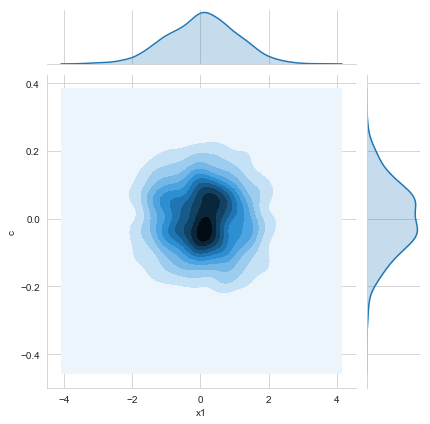

In [23]:
#fig = plt.figure(figsize=(6,6))
jp = sns.jointplot(data=spz.paramsTable, x='x1', y='c', kind='kde')
jp.fig.set_figheight(6)
jp.fig.set_figwidth(6)